## Deep Learning ChatBot

    Table Of Contents : 
        - Loading Data
        - Splitting the data into sentences , labels , responses
        - Simple Baseline Using Logistic Regression
        - Encoding The Data Labels
        - NLP Text Tokannize , clean
        - Neural Network Baseline
        - Neural Model Using Embedding Layer
        - Model With Deep Neural Network
        - Model With CNN & Embedding
        - Chat Demo

### Importing Libraries 

In [59]:
import json 
import numpy as np 
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D , GlobalMaxPooling1D,Flatten ,Conv1D, Dropout , Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lamz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lamz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Intents Files  

In [60]:
with open('intents.json') as file:
    data = json.load(file)

### Splitting the data into sentences , labels , responses 

In [61]:
training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])
    
    if intent['tag'] not in labels:
        labels.append(intent['tag'])
        
num_classes = len(labels)

In [62]:
len(set(training_labels))

47

In [63]:
training_sentences

['What to do if Cuts?',
 'How to cure Cuts?',
 'Which medicine to apply for Cuts?',
 'what to apply on cuts?',
 'Cuts',
 'Hi',
 'How are you',
 'Is anyone there?',
 'Hello',
 'Whats up',
 'cya',
 'See you later',
 'Goodbye',
 'I am Leaving',
 'Have a Good day',
 'bye',
 'how do you treat abrasions?',
 'Do Abrasions cause scars?',
 'Abrasions',
 'what to do if abrasions?',
 'Which medicine to apply for abrasions?',
 'How to cure abrasions?',
 'How do you treat Sting?',
 'Stings',
 'What to do if you get a sting?',
 'Which medicine to apply if sting?',
 'How to remove Splinters',
 'How to cure Splinters?',
 'What to do if I have splinters?',
 'How do you bring a splinter to the surface?',
 'How do you treat a sprain?',
 'what to do if i get a sprain?',
 'Which cream to apply if i get a sprain?',
 'Which medicine to apply if I get a sprain?',
 'How do you treat a strain?',
 'what to do if i get a strain?',
 'Which cream to apply if i get a strain?',
 'Which medicine to apply if I get a st

In [64]:
training_labels

['Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'Cuts',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'Abrasions',
 'stings',
 'stings',
 'stings',
 'stings',
 'Splinter',
 'Splinter',
 'Splinter',
 'Splinter',
 'Sprains',
 'Sprains',
 'Sprains',
 'Sprains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Strains',
 'Fever',
 'Fever',
 'Fever',
 'Fever',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Nasal Congestion',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Cough',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Sore Throat',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Gastrointestinal problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Skin problems',
 'Abdonominal Pain',
 'Abdonominal Pain',
 'Ab

----
### Simple Baseline Using Logistic Regression 

In [65]:
sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

sentences_vectorizer = CountVectorizer()
sentences_vectorizer.fit(sentences_train)
Xlr_train = sentences_vectorizer.transform(sentences_train)
Xlr_test  = sentences_vectorizer.transform(sentences_test)
Xlr_train 

<163x135 sparse matrix of type '<class 'numpy.int64'>'
	with 918 stored elements in Compressed Sparse Row format>

In [67]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(Xlr_train, label_train)
score = LRmodel.score(Xlr_test, label_test)
print("Accuracy:", score) 

Accuracy: 0.6341463414634146


----------------------------------
### Encoding The Data Labels

In [68]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)
training_labels

array([10, 10, 10, 10, 10, 42, 42, 42, 42, 42, 41, 41, 41, 41, 41, 41,  1,
        1,  1,  1,  1,  1, 46, 46, 46, 46, 32, 32, 32, 32, 33, 33, 33, 33,
       34, 34, 34, 34, 34, 34, 15, 15, 15, 15, 24, 24, 24, 24, 24, 24,  9,
        9,  9,  9,  9, 31, 31, 31, 31, 18, 18, 18, 18, 30, 30, 30, 30,  0,
        0,  0,  0,  4,  4,  4,  4,  3,  3,  3,  3,  7,  7,  7,  7, 39, 39,
       39, 39, 11, 11, 11, 11, 17, 17, 17, 17, 21, 21, 21, 21, 22, 22, 22,
       22, 23, 23, 23, 23, 43, 43, 43, 43, 27, 27, 27, 27, 29, 29, 29, 29,
       35, 35, 35, 35, 37, 37, 37, 37, 38, 38, 38, 38, 25, 25, 25, 25, 13,
       13, 13, 13,  6,  6,  6,  6, 26, 26, 26, 26, 36, 36, 36, 36, 44, 44,
       44, 44, 19, 19, 19, 19, 14, 14, 14, 14, 20, 20, 20, 20,  8,  8,  8,
        8, 28, 28, 28, 28, 45, 45, 45, 45, 45, 40, 40, 40, 40, 40, 40, 40,
       12, 12, 12, 12,  5,  5,  5,  5, 16, 16, 16, 16,  2,  2,  2,  2,  2])

### NLP Text Tokannize , clean 

In [69]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token) # adding out of vocabulary token
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_len)

### Neural Network Baseline

In [70]:
baseline = Sequential()
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(128, activation='relu'))
baseline.add(Dense(num_classes, activation='softmax'))


baseline.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_nn = baseline.fit(padded_sequences,np.array(training_labels), epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 10.1315 - accuracy: 0.0294
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 6.1354 - accuracy: 0.0147
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 4.6946 - accuracy: 0.0490
Epoch 4/10
7/7 [==============================] - 0s 3ms/step - loss: 3.9679 - accuracy: 0.0588
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 3.4840 - accuracy: 0.1029
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 3.1639 - accuracy: 0.1471
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 3.0014 - accuracy: 0.1618
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 2.8481 - accuracy: 0.1765
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 2.7200 - accuracy: 0.1912
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 2.6264 - accuracy: 0.2108


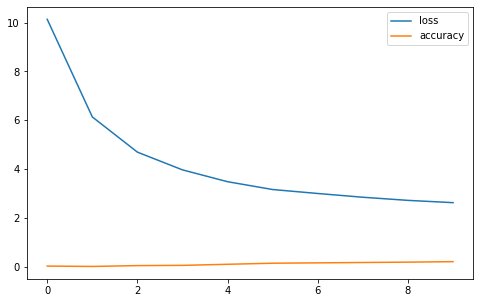

In [71]:
pd.DataFrame(baseline_nn.history).plot(figsize=(8,5))
plt.show()

### Buidling The Neural Model Using Embedding Layer 

In [72]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 20, 16)            16000     
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dense_26 (Dense)            (None, 16)                272       
                                                                 
 dense_27 (Dense)            (None, 47)                799       
                                                                 
Total params: 17,343
Trainable params: 17,343
Non-trainable params: 0
__________________________________________________

### Train The Model On Our Data
    - adding the early stop to know the proper epoch count , starting after 200

In [74]:
epochs = 300
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=200)
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs , callbacks=[es])

Epoch 1/300
7/7 [==============================] - 2s 7ms/step - loss: 3.8507 - accuracy: 0.0049 
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 3.8496 - accuracy: 0.0343
Epoch 3/300
7/7 [==============================] - 0s 5ms/step - loss: 3.8490 - accuracy: 0.0343
Epoch 4/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8485 - accuracy: 0.0343
Epoch 5/300
7/7 [==============================] - 0s 5ms/step - loss: 3.8479 - accuracy: 0.0343
Epoch 6/300
7/7 [==============================] - 0s 5ms/step - loss: 3.8470 - accuracy: 0.0343
Epoch 7/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8462 - accuracy: 0.0343
Epoch 8/300
7/7 [==============================] - 0s 5ms/step - loss: 3.8452 - accuracy: 0.0343
Epoch 9/300
7/7 [==============================] - 0s 4ms/step - loss: 3.8443 - accuracy: 0.0343
Epoch 10/300
7/7 [==============================] - 0s 5ms/step - loss: 3.8432 - accuracy: 0.0343
Epoch 11/300
7/7 [==========

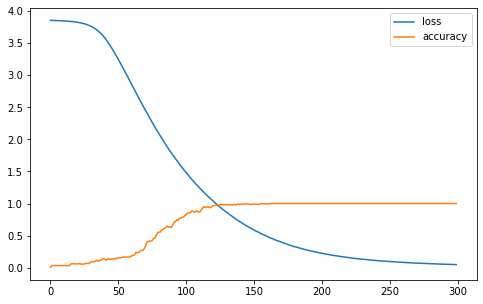

In [75]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

### Saving The Model , Tokenizer , Encoded Labels

In [76]:
import pickle

model.save("chat_model")

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model\assets


---------
### Build The Model With Deep Neural Network

In [77]:
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json', encoding='utf-8').read()

for intent in data['intents']:
    for pattern in intent['patterns']:

        w = nltk.word_tokenize(pattern)
        words.extend(w)

        documents.append((w, intent['tag']))


        if intent['tag'] not in classes:
            classes.append(intent['tag'])

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)

print (len(words), "unique words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

204 documents
47 classes ['Abdonominal Pain', 'Abrasions', 'Answer', 'Broken Toe', 'Bruises', 'CPR', 'Chemical Burn', 'Choking', 'Cold', 'Cough', 'Cuts', 'Diarrhea', 'Drowning', 'Eye Injury', 'Fainting', 'Fever', 'Fracture', 'Frost bite', 'Gastrointestinal problems', 'Head Injury', 'Headache', 'Heat Exhaustion', 'Heat Stroke', 'Insect Bites', 'Nasal Congestion', 'Normal Bleeding', 'Poison', 'Pulled Muscle', 'Rash', 'Rectal bleeding', 'Skin problems', 'Sore Throat', 'Splinter', 'Sprains', 'Strains', 'Sun Burn', 'Teeth', 'Testicle Pain', 'Vertigo', 'Wound', 'animal bite', 'goodbye', 'greeting', 'nose bleed', 'seizure', 'snake bite', 'stings']
140 unique words ['a', 'abdonominal', 'abrasion', 'allergy', 'am', 'an', 'animal', 'answer', 'anyone', 'apply', 'are', 'better', 'bit', 'bite', 'bitten', 'bleed', 'bleeding', 'blocked', 'bring', 'broken', 'bruise', 'burn', 'by', 'bye', 'can', 'cause', 'chemical', 'choke', 'choked', 'choking', 'cold', 'congestion', 'cough', 'cpr', 'cream', 'cure', 'c

In [78]:
# initializing training data
training = []
output_empty = [0] * len(classes)
for doc in documents:

    bag = []

    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)


    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

random.shuffle(training)
training = np.array(training)
training

<ipython-input-78-267d94db582c>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training = np.array(training)


array([[list([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
        list([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])],
       [list([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [79]:
train_x = list(training[:,0])
train_y = list(training[:,1])

In [80]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)
model.save('chatbot_model.h5', hist)

C:\Users\lamz\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
41/41 [==============================] - 2s 3ms/step - loss: 3.8665 - accuracy: 0.0196
Epoch 2/150
41/41 [==============================] - 0s 3ms/step - loss: 3.8115 - accuracy: 0.0392
Epoch 3/150
41/41 [==============================] - 0s 3ms/step - loss: 3.7427 - accuracy: 0.1029
Epoch 4/150
41/41 [==============================] - 0s 3ms/step - loss: 3.6830 - accuracy: 0.0980
Epoch 5/150
41/41 [==============================] - 0s 3ms/step - loss: 3.5447 - accuracy: 0.1324
Epoch 6/150
41/41 [==============================] - 0s 3ms/step - loss: 3.3956 - accuracy: 0.1863
Epoch 7/150
41/41 [==============================] - 0s 3ms/step - loss: 3.1869 - accuracy: 0.2108
Epoch 8/150
41/41 [==============================] - 0s 2ms/step - loss: 2.9187 - accuracy: 0.2843
Epoch 9/150
41/41 [==============================] - 0s 4ms/step - loss: 2.6283 - accuracy: 0.3725
Epoch 10/150
41/41 [==============================] - 0s 5ms/step - loss: 2.2711 - accuracy: 0.4951
Epoch 11/

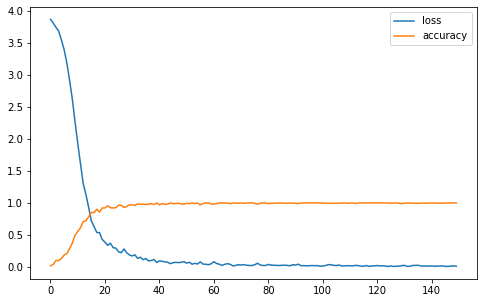

In [81]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

------
## Build The Model With Conv

In [82]:
from keras.preprocessing.text import Tokenizer


sentences_train, sentences_test, label_train, label_test = train_test_split(
    training_sentences, training_labels, test_size=0.20, random_state=1000)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
Xcnn_train = tokenizer.texts_to_sequences(sentences_train)
Xcnn_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  
print(sentences_train[1])
print(Xcnn_train[1]) 

How do you treat a mild Headache?
[5, 2, 9, 10, 3, 20, 62]


In [83]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
print(Xcnn_train[0, :]) 

[ 8  1  2  4 61 27 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]


In [84]:
embedding_dim = 200
textcnnmodel = Sequential()
textcnnmodel.add(Embedding(vocab_size, embedding_dim, input_length=maxlen))
textcnnmodel.add(Conv1D(128, 5, activation='relu'))
textcnnmodel.add(GlobalMaxPooling1D())
textcnnmodel.add(Dense(10, activation='relu'))
textcnnmodel.add(Dense(1, activation='sigmoid'))

textcnnmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
textcnnmodel.summary() 

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 200)          27600     
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           128128    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 157,029
Trainable params: 157,029
Non-trainable params: 0
_______________________________________________

In [85]:

textmodel = textcnnmodel.fit(Xcnn_train, np.array(label_train),epochs=50,verbose=1,validation_data=(Xcnn_test, label_test),batch_size=10)

loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
17/17 [==============================] - 1s 28ms/step - loss: -24.6634 - accuracy: 0.0307 - val_loss: -79.4080 - val_accuracy: 0.0244
Epoch 2/50
17/17 [==============================] - 0s 23ms/step - loss: -165.7298 - accuracy: 0.0307 - val_loss: -358.5194 - val_accuracy: 0.0244
Epoch 3/50
17/17 [==============================] - 0s 18ms/step - loss: -614.0424 - accuracy: 0.0307 - val_loss: -1192.0479 - val_accuracy: 0.0244
Epoch 4/50
17/17 [==============================] - 0s 21ms/step - loss: -1820.2708 - accuracy: 0.0307 - val_loss: -3236.4573 - val_accuracy: 0.0244
Epoch 5/50
17/17 [==============================] - 0s 20ms/step - loss: -4425.1572 - accuracy: 0.0307 - val_loss: -7529.5684 - val_accuracy: 0.0244
Epoch 6/50
17/17 [==============================] - 0s 17ms/step - loss: -9894.9521 - accuracy: 0.0307 - val_loss: -15457.0762 - val_accuracy: 0.0244
Epoch 7/50
17/17 [==============================] - 0s 21ms/step - loss: -19344.4180 - accuracy: 0.0307 - val_lo

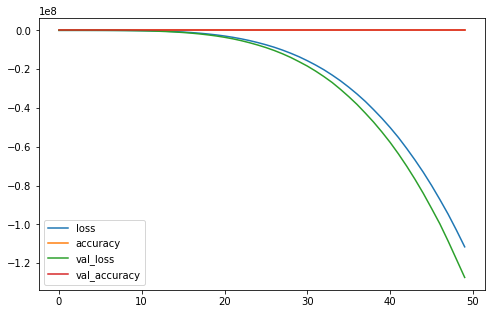

In [86]:
pd.DataFrame(textmodel.history).plot(figsize=(8,5))
plt.show()

In [87]:
import json 
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama 
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

with open("intents.json") as file:
     data = json.load(file)


def chat():
     # load trained model
     model = keras.models.load_model('chat_model')

     # load tokenizer object
with open('tokenizer.pickle', 'rb') as handle:
         tokenizer = pickle.load(handle)

    # load label encoder object
with open('label_encoder.pickle', 'rb') as enc:
     lbl_encoder = pickle.load(enc)

    # parameters
max_len = 20
    
while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len))
        tag = lbl_encoder.inverse_transform([np.argmax(result)])

        for i in data['intents']:
            if i['tag'] == tag:
                print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL , np.random.choice(i['responses']))

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

User: 